<a href="https://colab.research.google.com/github/christakahashi/ECE447/blob/master/lectures/transfer_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECE 447: Transfer Functions
===
In which we begin our descent into the *frequency domain*

Updated by 
 Dr. Chris Takahashi

Authored by Prof. Eric Klavins &copy; 2019, University of Washington


In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

#comment out for light mode
plt.style.use('dark_background')

try: 
  import google.colab #test for colab
  import IPython
  def setup_typeset():
    """MathJax initialization for the current cell.
    
    This installs and configures MathJax for the current output.
    """
    IPython.display.display(IPython.display.HTML('''
        <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
        <script>
          (() => {
            const mathjax = window.MathJax;
            mathjax.Hub.Config({
            'tex2jax': {
              'inlineMath': [['$', '$'], ['\\(', '\\)']],
              'displayMath': [['$$', '$$'], ['\\[', '\\]']],
              'processEscapes': true,
              'processEnvironments': true,
              'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
              'displayAlign': 'center',
            },
            'HTML-CSS': {
              'styles': {'.MathJax_Display': {'margin': 0}},
              'linebreaks': {'automatic': true},
              // Disable to prevent OTF font loading, which aren't part of our
              // distribution.
              'imageFont': null,
            },
            'messageStyle': 'none'
          });
          mathjax.Hub.Configured();
        })();
        </script>
        '''))
  def custom_latex_printer(exp,**options):
      setup_typeset()
      return printing.latex(exp,**options)
  init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
except:
  init_printing(use_latex='mathjax')

Laplace Transforms
===

The **Laplace transform** of a function of time $f(t)$ is

$$
F(s) = \mathcal{L}[f(t)] = \int_0^\infty e^{-st} f(t) dt
$$

where $s$ is a complex number.

Example: 1
---

Suppose 

$$
y(t) = 1
$$

\begin{align}
Y(s) & = \int_0^\infty e^{-st} 1 dt \\
                  & = -\left.\frac{1}{s} e^{-st}\right|_0^\infty \\
                  & = -\frac{1}{s} ( 0 - 1 ) \\
                  & = \frac{1}{s}
\end{align}

Example: t
---

Suppose 

$$
y(t) = t
$$

To find the Laplace transform, use integration by parts $\int v du = uv - \int u dv$ with $u=t$ and $v = \frac{1}{s}e^{-st}$. Then

\begin{align}
Y(s) & = \int_0^\infty e^{-st} t dt \\
                  & = \left.-\frac{t}{s}e^{-st}\right|_0^\infty +   
                      \frac{1}{s} \int_0^\infty e^{-st} dt \\
                  & = \frac{1}{s^2}
\end{align}

Example: $e^{-at}$
---

Suppose 

$$
y(t) = e^{-at}
$$

then 

\begin{align}
Y(s) & = \int_0^\infty e^{-st} e^{-at} dt \\
                  & = \int_0^\infty e^{-(s+a)t} dt \\
                  & = \left.-\frac{1}{s+a}e^{-(s+a)t}\right|_0^\infty \\
                  & = -\frac{1}{s+a} ( 0 - 1 ) \\
                  & = \frac{1}{s+a}
\end{align}

Example
---

Suppose

$$
y(t) = 4 - 3 e^{-t} 
$$

then

\begin{align}
Y(s) & = \frac{4}{s} - \frac{3}{s+1} \\
     & = \frac{s+4}{s(s+1)} .
\end{align}

Transfer functions from linear ODEs
===

Consider a differential equation of the form

$$
a_2 \ddot y _+ a_1 \dot y + a_0 y = b_1 \dot u + b_0 u
$$

where $y$ is the output and $u$ is the input. The **transfer function** of this system is

$$
T(s) := \frac{Y(s)}{U(s)} = \frac{\mathrm{Laplace\;transfer\;if\;the\;output}}{\mathrm{Laplace\;transfer\;if\;the\;input}} .
$$

assuming $y(0) = \dot y(0) = y(0) = \dot u(0) = 0$.

Say $F(s)$ is the Laplace transform of $f(t)$. Then using integration by parts we get:

\begin{align}
\mathcal{L}[f'(t)] & = \int_0^\infty e^{-st} f'(t) dt \\
                   & = \left. e^{-st}f(t) \right|_0^\infty + s \int_0^\infty e^{-st} f'(t) dt \\
                   & = - f(0) + s F(s)
\end{align}

Similarly,

$$
\mathcal{L}[f''(t)] = s^2 F(s)
$$

and so on.

Therefore, it is straightforward to compute the Transfer function of equations like that above. 

Example
---

The Laplace transform of 

$$
2 \ddot y - \dot y + y = \dot u - u
$$

is

$$
2 s^2 Y(s) - sY(s) + Y(s) = s U(s) - U(s)
$$

or

$$
Y(s)(2s^2 - s + 1) = U(s)(s-1)
$$

so that the transfer function is 

$$
T(s) = \frac{Y(s)}{U(s)} = \frac{s-1}{2s^2 - s + 1}
$$

The roots of the numerator are called the **zeros** and the roots of the denominator are called the **poles**. We often draw this in the complex plane as follows.

In [3]:
var("s")
zero = solve(s-1,s)[0]
poles = solve(2*s**2-s+1,s)
zero,poles

⎛   ⎡1   √7⋅ⅈ  1   √7⋅ⅈ⎤⎞
⎜1, ⎢─ - ────, ─ + ────⎥⎟
⎝   ⎣4    4    4    4  ⎦⎠

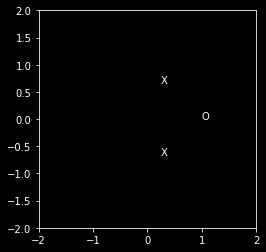

In [4]:
circle = plt.Text(re(zero), im(zero), "O")
x1 = plt.Text(re(poles[0]), im(poles[0]), "X")
x2 = plt.Text(re(poles[1]), im(poles[1]), "X")
fig, ax = plt.subplots()
ax.add_artist(circle)
ax.add_artist(x1)
ax.add_artist(x2)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')

From State Space
===

Suppose we start with a state space system:
    
\begin{align}
\dot x & = A x + B u \\
y & = C x
\end{align}

Call ${\bf X}(s)$ the vector of Laplace transforms of the elements of $\bf x$. Then

\begin{align}
s{\bf X}(s) & = A {\bf X}(s) + B U(s) \\
Y(s) & = C {\bf X}(s)
\end{align}

Then

\begin{align}
s{\bf X}(s) - A {\bf X}(s) & = B U(s) \\
(sI-A){\bf X}(s) & = B U(s) 
\end{align}

or

$$
{\bf X}(s) = (sI-A)^{-1}B U(s) 
$$

Since $Y(s) = C {\bf X}(s)$ we get

$$
Y(s) = C (sI-A)^{-1}B U(s)
$$

or 

$$
T(s) = \frac{Y(s)}{U(s)} = C (sI-A)^{-1} B.
$$

Notice the similarity between $sI-A$ and the formula we use to compute eigenvalues. 

The quantity $(sI-A)^{-1}$ is usually denoted by $\Phi(s)$ is textbooks so that

$$
T(s) = C \Phi(s) B .
$$

Example
---

Suppose 

\begin{align}
\dot x & = \begin{pmatrix}
0 & 1 \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix}x + \begin{pmatrix}
-1 \\
\frac{1}{2}
\end{pmatrix}u \\
y & = (-\frac{1}{2} \;\; 0) x
\end{align}

then

In [5]:
var("s")
A = Matrix([[0,1],[-1/2,1/2]])
B = Matrix([[-1],[1/2]])
C = Matrix([[-1/2,0]])
Phi = (s*eye(2)-A).inv()
Phi

⎡     -0.5⋅s + 0.25                -0.5          ⎤
⎢───────────────────────  ───────────────────────⎥
⎢-0.5⋅s⋅(s - 0.5) - 0.25  -0.5⋅s⋅(s - 0.5) - 0.25⎥
⎢                                                ⎥
⎢         0.5                      -s            ⎥
⎢  ──────────────────       ──────────────────   ⎥
⎣  -s⋅(s - 0.5) - 0.5       -s⋅(s - 0.5) - 0.5   ⎦

In [6]:
T = C*Phi*B
T.simplify()
T

⎡     0.25⋅(s - 1)     ⎤
⎢──────────────────────⎥
⎣0.5⋅s⋅(s - 0.5) + 0.25⎦

Note that this is the same transfer function as we got for the system $2 \ddot y - \dot y + y = \dot u - u$! This is because these are two representations for the same linear I/O system.

Final Value Theorem
===

Remember that

\begin{align}
\mathcal{L}[f'(t)] & = \int_0^\infty e^{-st} f'(t) dt \\
                   & =  s F(s) - f(0) .
\end{align}

Now take the limit as $s \rightarrow 0$. We get

\begin{align}
\int_0^\infty f'(t) dt & = \lim_{s \rightarrow 0} ( s F(s) - f(0) ) \\
f(\infty) - f(0) & = \lim_{s \rightarrow 0} s F(s) - f(0) \\
f(\infty) & =  \lim_{s \rightarrow 0} s F(s)
\end{align}

which is equivalent to saying

$$
\lim_{t \rightarrow \infty} f(t)= \lim_{s \rightarrow 0} s F(s).
$$

This is called the final value theorem.

Note:
- Cannot have more than one pole (eigenvalue) at zero.
- Must be stable (no poles (eigenvalue) in the right half plane).

Example
---

Suppose that

$$
Y(s) = \frac{s+4}{s(s+1)}.
$$

Then

\begin{align}
\lim_{s \rightarrow 0} s Y(s) & = \lim_{s \rightarrow 0}  s \frac{s+4}{s(s+1)} \\
 & = 4.
\end{align}

We can check this by expanding $Y(s)$ into

$$
Y(s) = \frac{4}{s} -\frac{3}{s+1}.
$$

Note that $\mathcal{L}[1] = \frac{1}{s}$ and $\mathcal{L}[\frac{1}{s+1}] = e^{-t}$. Thus,

$$
y(t) = 4 - 3 e^{-t} \rightarrow 4
$$

as $t \rightarrow \infty$. 

Step Inputs
---

The final value theorem gives you a way to check the response of a systemto the standard input $u=1$, called the step input. More exactly, the input $u$ that is zero for $t<0$ and one for $t\geq 0$. From what we know about Laplace transforms, $U(s) = 1/s$. 

Then the response of a system to a step input is

$$
T(s) = \frac{Y(s)}{U(s)}
$$

Which in this case is

$$
Y(s) = \frac{1}{s}T(s)
$$

Example
---

Say

$$
T(s) = \frac{s+2}{(s+1)^2}
$$

Then the response of the system $T(s)$ to a step input is

$$
Y(s) = \frac{1}{s} \frac{s+2}{(s+1)^2}
$$

And as $t \rightarrow \infty$ we get

$$
\lim_{s \rightarrow 0} s Y(s) = \lim_{s \rightarrow 0} \frac{s+2}{(s+1)^2} = 2.
$$

Final Value Theorem in State Space
===

Suppose

\begin{align}
\dot x & = A x + B u \\
y & = C x
\end{align}

then at equilibrium

$$
0 = A x^* + B u
$$

So that, assuming $A$ is invertible, we get

$$
x^* = - A^{-1} B u
$$

and 

$$
y = - C A^{-1} B u
$$

Notice that if $A$ is not invertible, we get eigenvalues equal to zero, which means that there are marginally stable equilibria. In that case, the final value depends on the initial condition.

Example
---

Suppose 

\begin{align}
\dot x & = \begin{pmatrix}
0 & 1 \\
-1 & -2
\end{pmatrix}x + \begin{pmatrix}
0 \\
1
\end{pmatrix}u \\
y & = (2\;\;1) x
\end{align}

Then 

$$
A^{-1} = \begin{pmatrix}
-2 & -1 \\
1 & 0 
\end{pmatrix}
$$

and

$$
y \rightarrow - C A^{-1} B = 2
$$

Note that the above two examples actually come from the same example since, as you can check,

$$
B(sI-A)^{-1}C = \frac{s+2}{(s+1)^2}
$$

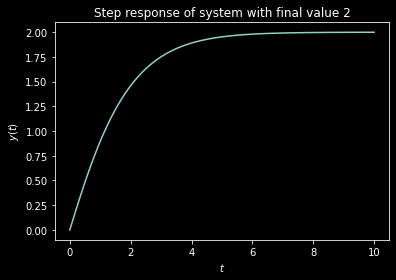

In [7]:
var("t tau")
A = Matrix([[0,1],[-1,-2]])
B = Matrix([[0],[1]])
C = Matrix([[2,1]])
x0 = Matrix([[0],[0]])
u = 1
y = C*(exp(A*t)*x0 + integrate(exp(A*(t-tau))*B*u,(tau,0,t)))
tvals = np.linspace(0,10,100)
f = lambdify(t,y[0], modules=['numpy'])
plt.plot(tvals,f(tvals));
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.title("Step response of system with final value 2");

Summary
===

- Laplace transforms of simple functions are easy to compute
- Transfer functions account for input and output in the *frequency domain*
- Can convert state space representations into transfer functions
- Final value of a system can be found with either the transfer function or state space